# Importing Dependencies

In [1]:
# pip install yfinance

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Collection & Loading

In [3]:
end = datetime.now()
start = datetime(end.year-35, end.month, end.day)

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


# Data Preprocessing 

In [5]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2004-08-19,2.490185,2.582506,2.381485,2.481747,897427216
2004-08-20,2.687981,2.707090,2.494156,2.506813,458857488
2004-08-23,2.715032,2.816287,2.706346,2.748535,366857939
2004-08-24,2.602608,2.769629,2.570345,2.760695,306396159
2004-08-25,2.630652,2.680287,2.578039,2.604841,184645512


In [6]:
google_data.shape

(5167, 5)

In [7]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5167 entries, 2004-08-19 to 2025-03-03
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5167 non-null   float64
 1   (High, GOOG)    5167 non-null   float64
 2   (Low, GOOG)     5167 non-null   float64
 3   (Open, GOOG)    5167 non-null   float64
 4   (Volume, GOOG)  5167 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 242.2 KB


In [8]:
google_data.isnull().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [9]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [10]:
# Fill missing values (if any) using forward fill
google_data.fillna(method='ffill', inplace=True)

C:\Users\Dubai Computers\AppData\Local\Temp\ipykernel_12324\2777029279.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  google_data.fillna(method='ffill', inplace=True)


In [13]:
# Select only the 'Close' price and create a 'Days' column
df = google_data[['Close']].copy()
df['Days'] = np.arange(len(df))

In [14]:
print(google_data.columns)

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])


# Data Visualization

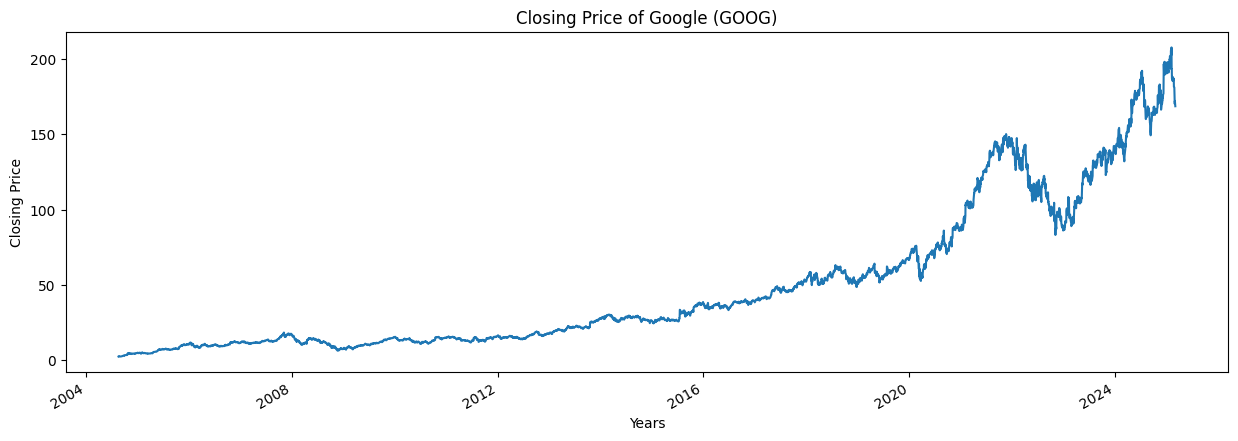

In [15]:
plt.figure(figsize=(15, 5))

# Correcting the MultiIndex column access
google_data[("Close", "GOOG")].plot()

plt.xlabel("Years")
plt.ylabel("Closing Price")  # Updated ylabel to match the available column
plt.title("Closing Price of Google (GOOG)")  # Updated title to match the data

plt.show()

In [16]:
list(google_data.columns)

[('Close', 'GOOG'),
 ('High', 'GOOG'),
 ('Low', 'GOOG'),
 ('Open', 'GOOG'),
 ('Volume', 'GOOG')]

# Ploting 

In [17]:
def plot_graph(figsize, values, column_name):
  plt.figure()
  values.plot(figsize =figsize)
  plt.xlabel("Years")
  plt.ylabel("Closing Price")  # Updated ylabel to match the available column
  plt.title("Closing Price of Google (GOOG)")  # Updated title to match the data

  plt.show()

In [18]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

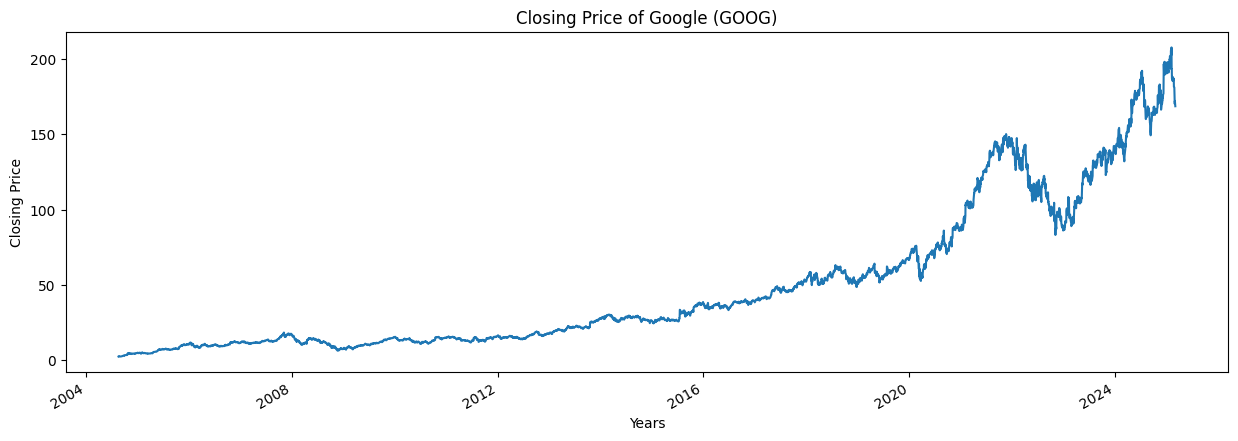

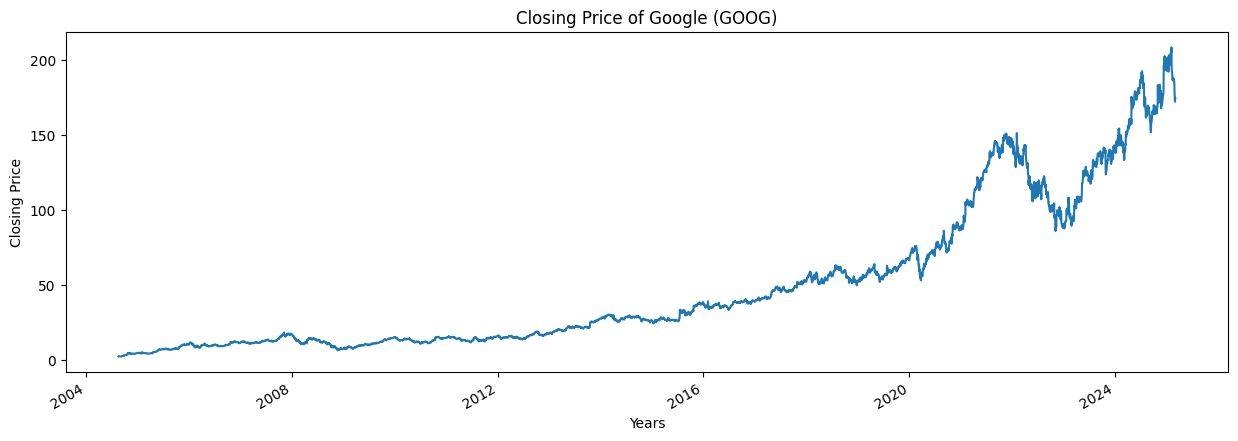

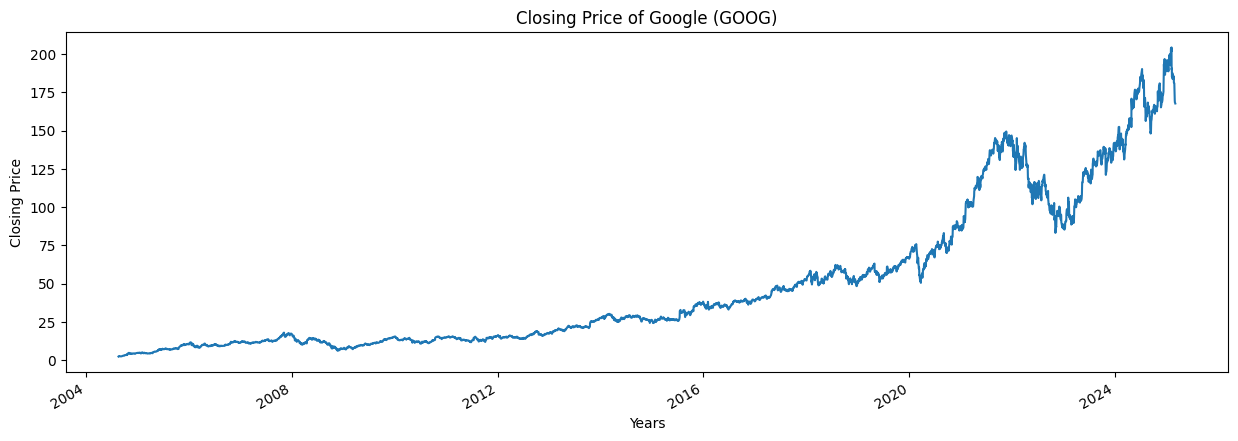

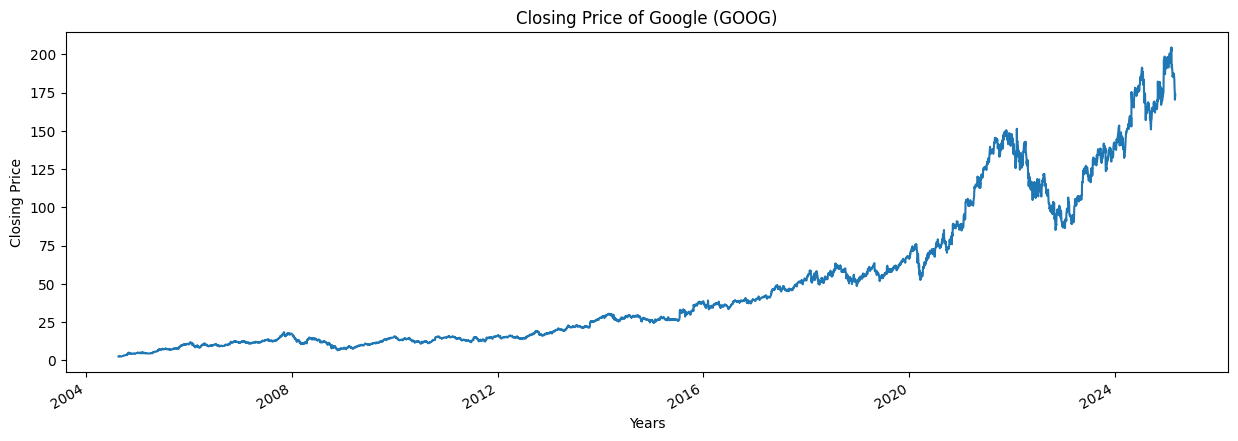

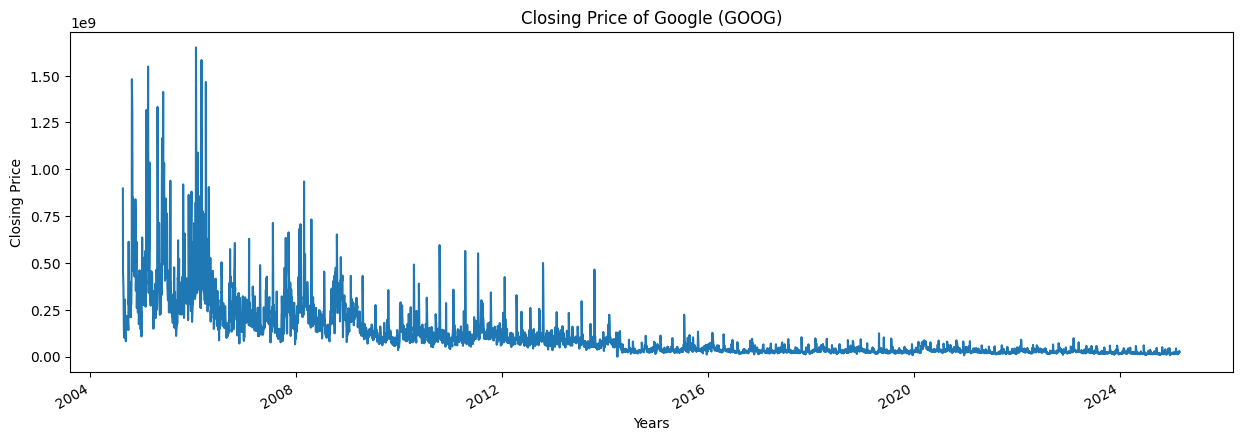

In [30]:
for column in google_data.columns:
    plot_graph((15,5), google_data[column], column)

# Feature & Label Splitting

In [20]:
# Define features (X) and target (y)
X = df[['Days']]  # Independent variable (days)
y = df['Close']   # Dependent variable (closing price)

# Train Test Split

In [21]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [22]:
# Display the shapes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4133, 1), (1034, 1), (4133, 1), (1034, 1))

# Model Training 

In [23]:
# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

# Model Prediction

In [24]:
# Make predictions
y_pred = model.predict(X_test)

In [25]:
# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 65.43
Mean Squared Error (MSE): 4905.52
Root Mean Squared Error (RMSE): 70.04


# Digrametically Visualization

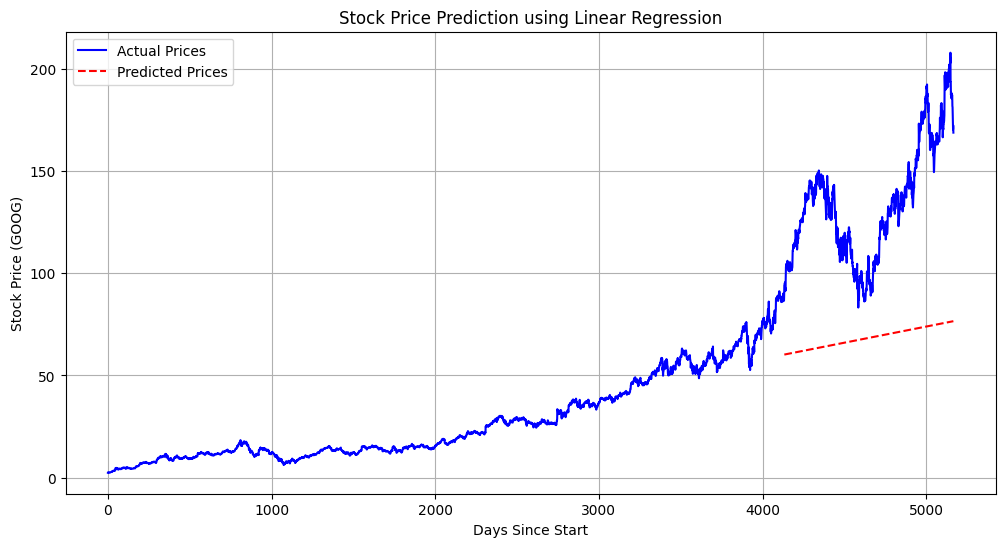

In [26]:
plt.figure(figsize=(12,6))

# Plot actual stock prices
plt.plot(df['Days'], df['Close'], label="Actual Prices", color='blue')

# Plot predicted stock prices
plt.plot(X_test, y_pred, label="Predicted Prices", color='red', linestyle='dashed')

plt.xlabel("Days Since Start")
plt.ylabel("Stock Price (GOOG)")
plt.title("Stock Price Prediction using Linear Regression")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 

In [27]:
# Predict stock price for the next 30 days
future_days = 30
future_X = np.arange(len(df), len(df) + future_days).reshape(-1, 1)
future_pred = model.predict(future_X)

# Create a dataframe for future predictions
future_df = pd.DataFrame({'Days': future_X.flatten(), 'Predicted Price': future_pred.flatten()})

# Future Prediction

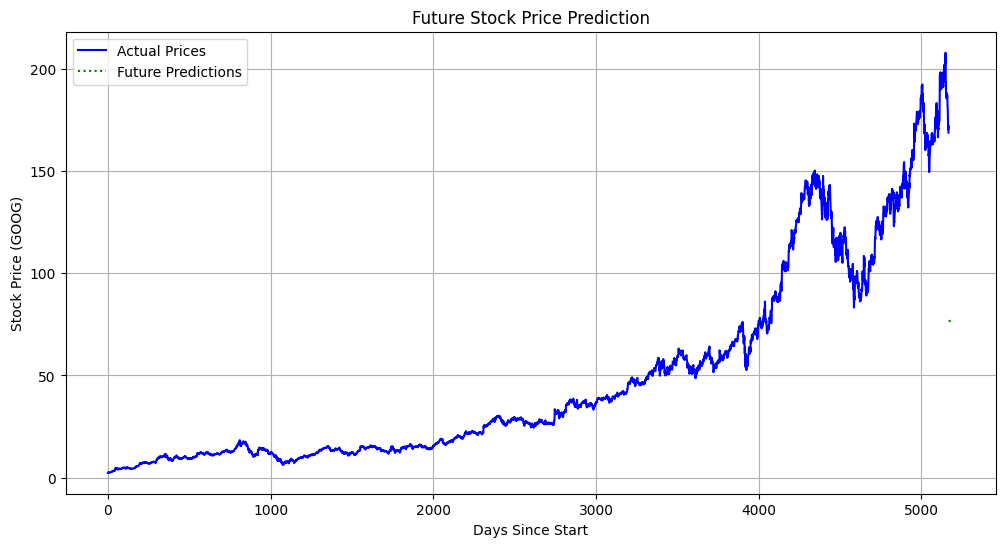

In [28]:
# Plot future predictions
plt.figure(figsize=(12,6))
plt.plot(df['Days'], df['Close'], label="Actual Prices", color='blue')
plt.plot(future_df['Days'], future_df['Predicted Price'], label="Future Predictions", color='green', linestyle='dotted')
plt.xlabel("Days Since Start")
plt.ylabel("Stock Price (GOOG)")
plt.title("Future Stock Price Prediction")
plt.legend()
plt.grid()
plt.show()

In [29]:
# Display future predictions
future_df.head(10)

,Days,Predicted Price
0,5167,76.544948
1,5168,76.560735
2,5169,76.576522
3,5170,76.592308
4,5171,76.608095
5,5172,76.623882
6,5173,76.639669
7,5174,76.655456
8,5175,76.671243
9,5176,76.687030


# Save Model

In [33]:
import joblib
filename = "stock_price_model.pkl"

# Save the trained model
joblib.dump(model, filename)

print("Model saved successfully! 🎉")

Model saved successfully! 🎉


# Load Model 

In [36]:
# Load the saved model
loaded_model = joblib.load(filename)

# Make predictions using the loaded model
future_pred = loaded_model.predict(future_X)

#Display first few predictions
print("Future Predictions:\n", future_pred[:10])

Future Predictions:
 [[76.54494774]
 [76.56073466]
 [76.57652158]
 [76.5923085 ]
 [76.60809542]
 [76.62388233]
 [76.63966925]
 [76.65545617]
 [76.67124309]
 [76.68703001]]
